In [3]:
%load_ext autoreload
%autoreload 2
import sys

from matplotlib import rc

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_svmlight_file
import numpy as np
import pickle
import glob
import os

from matplotlib.ticker import MaxNLocator

from utils import unpickle_dir

from constants import LOSS_PER_EPOCH

LOG_SCALE = True

In [4]:
optimums = unpickle_dir('dump/optimum-epsilon/')
exact_optimum = optimums['baselines']['epsilon']

In [5]:
exact_optimum

0.2822915437266857

In [6]:
n, d = 400000, 2000

In [11]:
def plot_final(method, quantization, split_way, num_nodes,topology, label, display_name):
    
    data = unpickle_dir('dump/epsilon-final-' + method + "-" + quantization + ("" if len(quantization) == 0 else "-")
                + split_way + "-" + str(num_nodes)+"-"+topology)
    print(data['results'][1])
    
    x = (np.arange(0, len(data['results'][1]))-shift)/LOSS_PER_EPOCH

    
    
    plt.plot(x, data['results'][1]-exact_optimum, label = display_name)
   

    


[0.69298637 0.31802283 0.29629589 0.29316752 0.29020142 0.28871612
 0.28904606 0.28676698 0.28529892 0.28473747 0.28591227 0.28471194
 0.28378063 0.28364066 0.28350615 0.28431057 0.28323212 0.28355233
 0.28353389 0.28334645 0.28379321 0.28277439 0.28269237 0.28248032
 0.28229661 0.28230901 0.28221174 0.28214731 0.2820463  0.28197303
 0.28278081 0.28208019 0.28186293 0.28182169 0.28178734 0.28174441
 0.28171323 0.2817533  0.28170944 0.28162139 0.28163383 0.28180943
 0.28168861 0.28157542 0.28173693 0.28147738 0.28152853 0.28143616
 0.28143367 0.28142222 0.28165915 0.28164019 0.28145716 0.28199147
 0.28143791 0.28149459 0.28128881 0.28141831 0.28151248 0.28140977
 0.28166386 0.28162956 0.28130902 0.28122901 0.28118909 0.28123196
 0.28173286 0.28116127 0.28119295 0.28211962 0.28123432 0.2811414
 0.28112136 0.28119269 0.28116198 0.28113804 0.2810953  0.28131793
 0.2810688  0.2813979  0.28123189 0.2810712  0.28106586 0.28104096
 0.28154484 0.2812884  0.28105305 0.28105412 0.28111014 0.28106

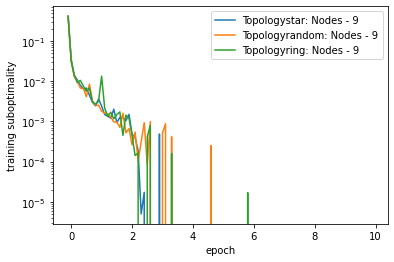

In [12]:
num_nodes = [9, 25, 64]
topologies = ['ring', 'star', 'random']
shift = 1
method = "decentralized"
quantization = ""
label =  'decentralized' + ""
display_name = 'plain'
color = "C0"
marker = 'o'
markevery = 10

for split_way in ['random']:
    
    
    
    for num_node in [9]:
        for topology in ['star', 'random', 'ring']:


            display_name = 'Topology' + topology + ': '+ "Nodes - "+str(num_node)  

            plot_final(method, quantization, split_way, num_node, topology, label, display_name )

    name = "Different number of nodes with " + topology + ' Topology' 
            
    plt.legend()
    plt.yscale("log")
    plt.xlabel('epoch')
    plt.ylabel('')
    plt.ylabel("training suboptimality")
#     plt.savefig(name, dpi =1000)
    